In [1]:
import os
import geopandas
import logging
import pandas as pd
import io
import subprocess
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patheffects as path_effects
import folium
from folium.plugins import HeatMap

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts
try:
    from PT3S import Rm
except:
    import Rm
try:
    from PT3S import ncd
except:
    import ncd

In [2]:
import inspect

# Print the source code of the module
#print(inspect.getsource(ncd))


In [3]:
import logging

logger = logging.getLogger()

logFileName = r"pNcd_DH.log"

loglevel = logging.DEBUG
logging.basicConfig(
    filename=logFileName,
    filemode='w',
    level=loglevel,
    format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s ; [%(filename)s:%(lineno)d - %(funcName)s]"
)

fileHandler = logging.FileHandler(logFileName)
logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s ; [%(filename)s:%(lineno)d - %(funcName)s]"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)


In [4]:
dbFilename="Example5"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [5]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True

)
#NBVAL_IGNORE_OUTPUT

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example5.db3 exists readable ... ; [Dx.py:322 - __init__]
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example5.db3 is newer than
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model ; [dxAndMxHelperFcts.py:1640 - readDxAndMx]
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.XML is newer than
+..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MX1:
+SirCalc's xmlFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model ; [dxAndMxHelperFcts.py:1652 - readDxAndMx]
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample5\B1\V0\BZ1\M-1-0-1.1.MXS reading ... ; [Mx.py:2156 - setResultsToMxsFile]
INFO    ; dxWithMx.__init__: Example5: processing dx and mx ... ; [dxAndMxHelperFcts.py:115 - __init__]
ERR

In [6]:
gdf_ROHR=m.gdf_ROHR

In [7]:
gdf_FWVB=m.gdf_FWVB

In [8]:
gdf_KNOT=m.gdf_KNOT

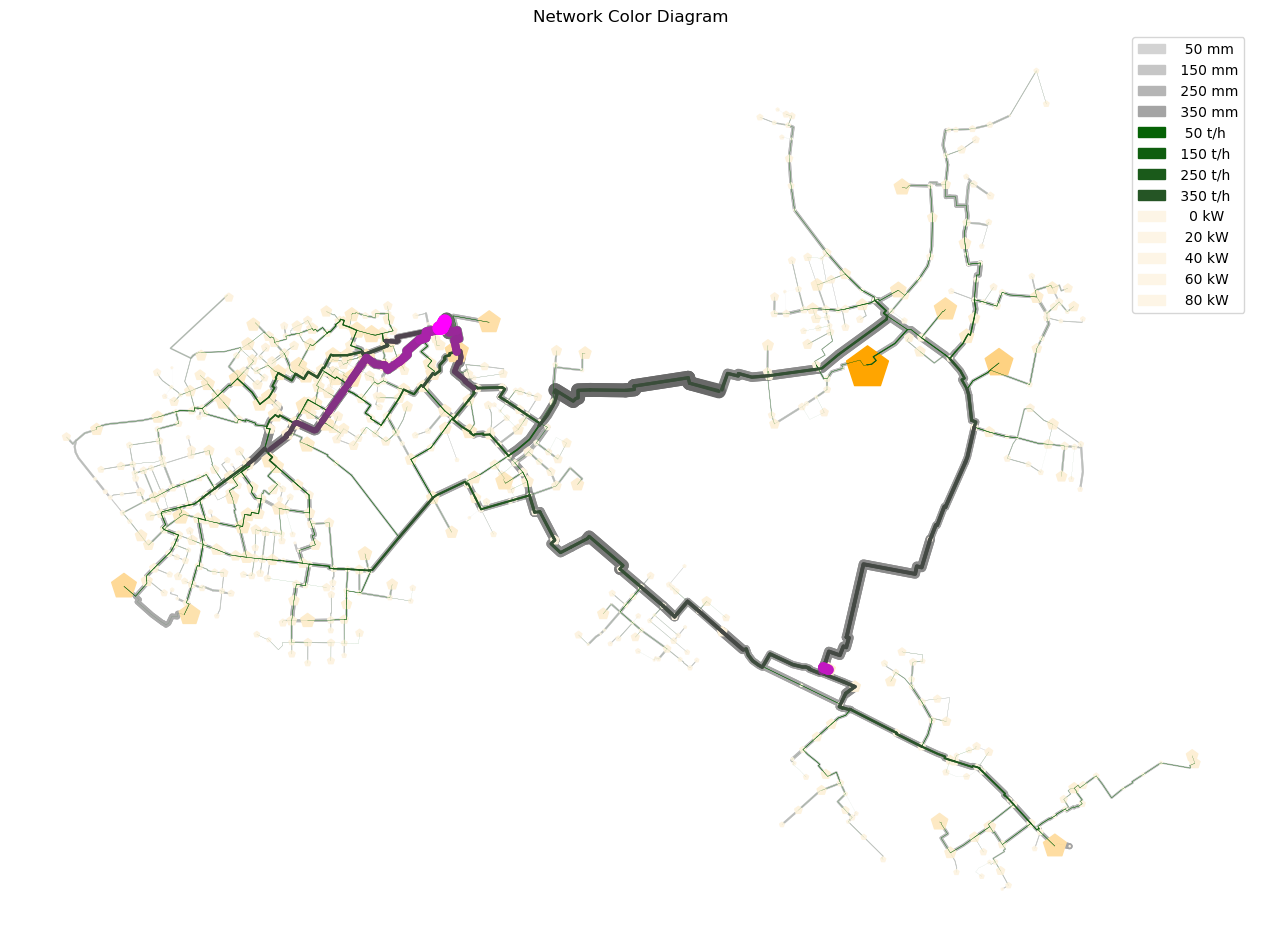

In [17]:
fig, ax = plt.subplots(figsize=Rm.DINA3q)

pipes_patches_1 = ncd.pNcd_pipes(ax=ax
                                 ,gdf=gdf_ROHR
                                 ,attribute='DI'
                                 ,colors = ['lightgray', 'dimgray']
                                 ,legend_fmt = '{:4.0f} mm'
                                 ,legend_values = [50,150,250,350]
                                )

nodes_patches = ncd.pNcd_nodes(ax=ax
                                ,gdf=gdf_FWVB
                                ,attribute='W'#kW
                                ,colors = ['oldlace', 'orange']
                                ,marker_style='p'
                                ,legend_fmt = '{:4.0f} kW'
                                ,legend_values = [0,20,40,60,80])

pipes_patches_2 = ncd.pNcd_pipes(ax=ax
                                 ,gdf=gdf_ROHR
                                 ,attribute='QMAVAbs'
                                 ,colors = ['darkgreen', 'magenta']
                                 ,legend_fmt = '{:4.0f} t/h'
                                 ,legend_values = [50,150,250,350])




all_patches = pipes_patches_1 + pipes_patches_2 + nodes_patches
ax.legend(handles=all_patches, loc='best')

plt.title('Network Color Diagram')
plt.show()